<a href="https://colab.research.google.com/github/abhi9rocks/NeuralStuff/blob/main/Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Program to check survival prediction

In [78]:
#connectiong colab to my drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Titanic Project

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Titanic Project


In [79]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:
sns.set() 

In [ ]:
#load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Checking the structure of Train Data

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
#counting the number of rows and columns in the dataset
print(train.shape)
print(test.shape)

(714, 7)
(418, 6)


In [ ]:
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Plotting the Graphs to analyse the distribution of data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


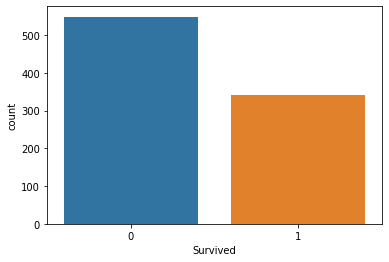

In [ ]:
#visualise the count of survivers
sns.countplot(train['Survived'])

In [ ]:
test.describe

<bound method NDFrame.describe of      PassengerId  Pclass  Sex   Age  ...      Fare  Cabin Embarked  Title
0            892       3    0  34.5  ...    7.8292    NaN        2    NaN
1            893       3    1  47.0  ...    7.0000    NaN        0    NaN
2            894       2    0  62.0  ...    9.6875    NaN        2    NaN
3            895       3    0  27.0  ...    8.6625    NaN        0    NaN
4            896       3    1  22.0  ...   12.2875    NaN        0    NaN
..           ...     ...  ...   ...  ...       ...    ...      ...    ...
413         1305       3    0   NaN  ...    8.0500    NaN        0    NaN
414         1306       1    1  39.0  ...  108.9000   C105        1    NaN
415         1307       3    0  38.5  ...    7.2500    NaN        0    NaN
416         1308       3    0   NaN  ...    8.0500    NaN        0    NaN
417         1309       3    0   NaN  ...   22.3583    NaN        1    NaN

[418 rows x 11 columns]>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

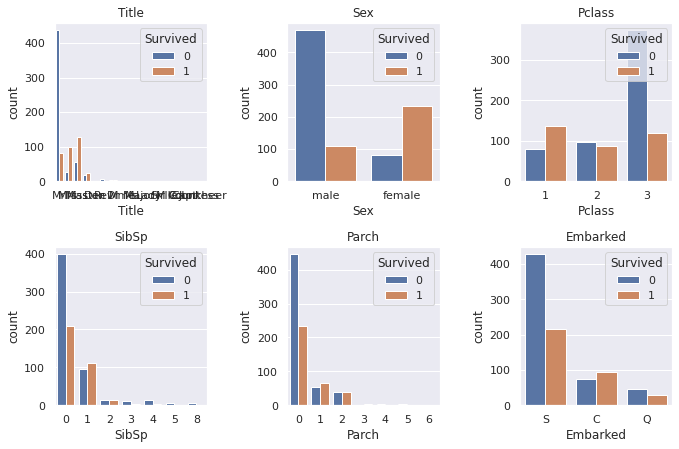

In [ ]:
 cols=['Title','Sex','Pclass','SibSp','Parch','Embarked']

 n_rows=2
 n_cols=3

 fig,axs=plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2, n_rows*3.2))

 for r in range(0,n_rows):
   for c in range(0,n_cols):
     i=r*n_cols +c 
     ax=axs[r][c]
     sns.countplot(train[cols[i]], hue=train['Survived'],ax=ax)
     ax.set_title(cols[i])
     ax.legend(title='Survived',loc='upper right')

plt.tight_layout()      


In [ ]:
 def bar_chart(feature):
  survived = train[train['Survived'] ==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df= pd.DataFrame([survived,dead])
  df.index =['Survived', 'Dead']
  df.plot(kind= 'bar', stacked= True, figsize=(10,5))

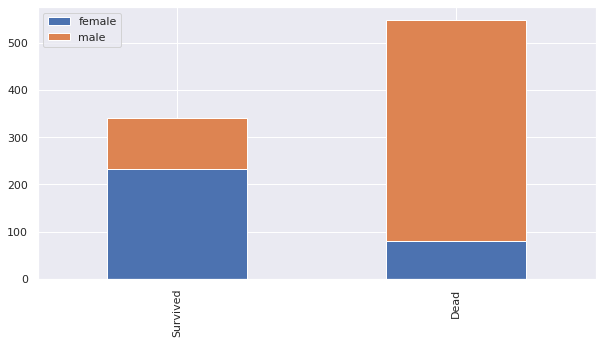

In [ ]:
bar_chart('Sex')

In [ ]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title']= dataset['Name'].str.extract('([A-Za-z]+)\.', expand= False)

In [ ]:
title_mapping= {"Mr":0 , "Miss":1, "Mrs":2,"Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, "Mlle":3, "Countess":3,"Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for datasets in train_test_data:
     dataset['Title']= dataset ['Title'].map(title_mapping)

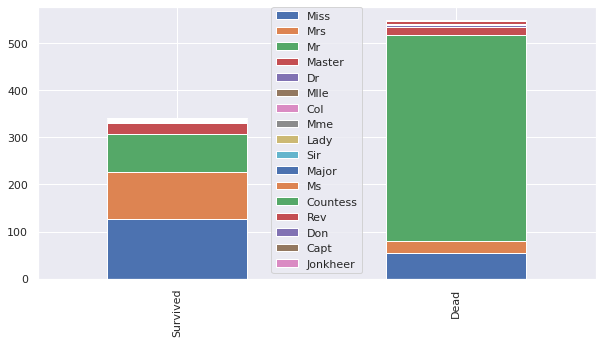

In [ ]:
bar_chart('Title')

In [ ]:
train.drop('Name', axis=1, inplace= True)
test.drop('Name', axis=1, inplace= True)


In [ ]:
sex_mapping= {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

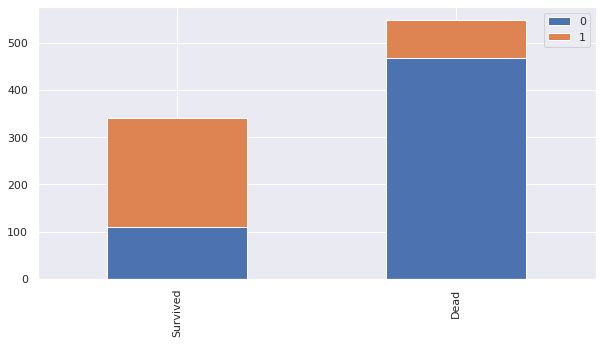

In [ ]:
bar_chart('Sex')

In [ ]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,0.188908
1,0.742038


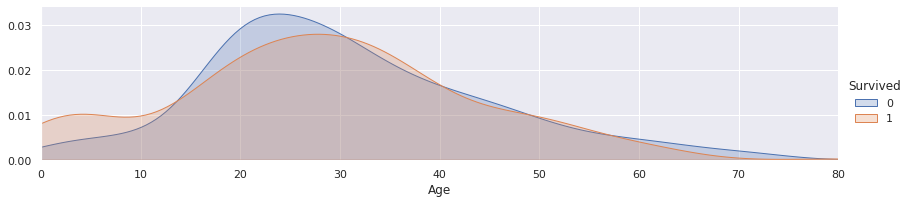

In [ ]:
facet = sns.FacetGrid(train, hue= "Survived", aspect= 4)
facet. map(sns.kdeplot, 'Age', shade= True)
facet.set(xlim= (0, train['Age'].max()))
facet.add_legend()
plt.show()

# Modifying The Test Data For Smooth Training

In [ ]:
#Removing the rows with missing values
train=train.dropna(subset=['Age'])

In [ ]:
train=train.drop(['Title'],axis=1)

In [ ]:
test.shape

(418, 11)

In [ ]:
test.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
Title          float64
dtype: object

In [ ]:
test=test.dropna(subset=['Age'])

In [ ]:
test=test.drop(['Title','PassengerId','Embarked','Cabin',],axis=1)

In [ ]:
test.shape

(418, 7)

In [ ]:
train.shape

(714, 7)

In [ ]:
train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Title        object
dtype: object

In [ ]:
train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [ ]:
print(train['Embarked'].unique())

['S' 'C' 'Q' nan]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [111]:
train.shape

(714, 7)

# Defining Test and Train Data

In [82]:
#Splitting the data into independent 'X' and dependent 'Y' variables
X=train.iloc[:,1:7].values
Y=train.iloc[:,0].values #Survival data is stored here

In [83]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [84]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [85]:
#create functions with machine learning models
def models (X_train, Y_train):
  #using Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  #use KNeighbours
  from sklearn.neighbors import KNeighborsClassifier
  knn= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
  knn.fit(X_train,Y_train)

  #use SVC
  from sklearn.svm import SVC
  svc_lin=SVC(kernel='linear',random_state=0)
  svc_lin.fit(X_train,Y_train)

  #use SVC (RBF Kernel)
  from sklearn.svm import SVC
  svc_rbf=SVC(kernel='rbf',random_state=0)
  svc_rbf.fit(X_train,Y_train)
  #use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss= GaussianNB()
  gauss.fit(X_train,Y_train)

  #use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree= DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(X_train,Y_train)

  #use the Random forestclassifier
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  forest.fit(X_train,Y_train)


  #print the training accuracy of each model
  print('[0]Logistic Regression Accuracy:',log.score(X_train,Y_train))
  print('[1]K Neighbours Training Accuracy:',knn.score(X_train,Y_train))
  print('[2]SVC Linear Training Accuracy:',svc_lin.score(X_train,Y_train))
  print('[3]svc rbf Training Accuracy:',svc_rbf.score(X_train,Y_train))
  print('[4]Gaussian NB Training Accuracy:',gauss.score(X_train,Y_train))
  print('[5]Decision Tree Training Accuracy:',tree.score(X_train,Y_train))
  print('[6]Random Forest Training Accuracy:',forest.score(X_train,Y_train))

  return log,knn,svc_lin,svc_rbf,gauss,tree,forest


In [86]:
#train the models
model=models(X_train,Y_train)

[0]Logistic Regression Accuracy: 0.7950963222416813
[1]K Neighbours Training Accuracy: 0.8563922942206655
[2]SVC Linear Training Accuracy: 0.7758318739054291
[3]svc rbf Training Accuracy: 0.8458844133099825
[4]Gaussian NB Training Accuracy: 0.7828371278458844
[5]Decision Tree Training Accuracy: 0.9877408056042032
[6]Random Forest Training Accuracy: 0.9667250437828371


In [87]:
#show the confusion matrix and accuracy on test data

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm=confusion_matrix(Y_test,model[i].predict(X_test))

  #extract TN,FP,FN,TP
  TN,FN,FP,TP = confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
  test_score=(TP+TN)/(TP+TN+FN+FP)
  print(cm)
  print('Model[{}] Testing Accuracy ="{}"'.format(i,test_score))
  print()



[[71  8]
 [14 50]]
Model[0] Testing Accuracy ="0.8461538461538461"

[[66 13]
 [18 46]]
Model[1] Testing Accuracy ="0.7832167832167832"

[[68 11]
 [18 46]]
Model[2] Testing Accuracy ="0.7972027972027972"

[[74  5]
 [24 40]]
Model[3] Testing Accuracy ="0.7972027972027972"

[[65 14]
 [20 44]]
Model[4] Testing Accuracy ="0.7622377622377622"

[[60 19]
 [21 43]]
Model[5] Testing Accuracy ="0.7202797202797203"

[[69 10]
 [22 42]]
Model[6] Testing Accuracy ="0.7762237762237763"



In [88]:
#get feature importance
forest=model[6]
importances=pd.DataFrame({'feature':train.iloc[:,1:7].columns, 'importance': np.round(forest.feature_importances_,3)})

importances=importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
Fare,0.309
Age,0.299
Sex,0.207
Pclass,0.086
SibSp,0.051
Parch,0.048


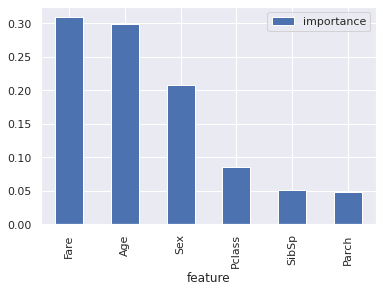

In [89]:
importances.plot.bar()

In [97]:
#print the prediction of the random forest classifire model
pred=model[6].predict(X_test)
print(pred)
print()

#Print the actual Values
print(Y_test)


[0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1
 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1]

[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1]


In [92]:
test.shape

(418, 6)

In [93]:
my_survival=[[1,0,38,5,0,71]]

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
my_survival_scaled=sc.fit_transform(my_survival)

In [96]:
#Print prediction of my survival using random forest
pred=model[6].predict(my_survival_scaled)

if pred==0:
  print('you did not get any space on the plank XD')
else:
  print('Mission Passed Respecc++')

you did not get any space on the plank XD


In [ ]:

my_survival=[[1,0,38,5,0,71]]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
my_survival_scaled=sc.fit_transform(my_survival)

#Print prediction of my survival using random forest
pred=model[6].predict(my_survival_scaled)

if pred==0:
  print('you did not get any space on the plank XD')
else:
  print('Mission Passed Respecc++')

you did not get any space on the plank XD


In [98]:
P_test=test

In [101]:
type(test)

pandas.core.frame.DataFrame

In [105]:
print(my_survival_scaled)

[[0. 0. 0. 0. 0. 0.]]


In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
P_test=sc.fit_transform(P_test)

In [109]:
#print the prediction of the random forest classifire model
pred=model[6].predict(P_test)
print(pred)
print()


[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0]



In [108]:
print(P_test)

            0         1         2         3         4         5
0    0.873482 -0.755929  0.298549 -0.499470 -0.400248 -0.497811
1    0.873482  1.322876   1.18133  0.616992 -0.400248  -0.51266
2   -0.315819 -0.755929   2.24066 -0.499470 -0.400248 -0.464532
3    0.873482 -0.755929 -0.231118 -0.499470 -0.400248 -0.482888
4    0.873482  1.322876 -0.584229  0.616992  0.619896 -0.417971
..        ...       ...       ...       ...       ...       ...
413  0.873482 -0.755929         0 -0.499470 -0.400248 -0.493856
414 -1.505120  1.322876   0.61635 -0.499470 -0.400248   1.31218
415  0.873482 -0.755929  0.581038 -0.499470 -0.400248 -0.508183
416  0.873482 -0.755929         0 -0.499470 -0.400248 -0.493856
417  0.873482 -0.755929         0  0.616992  0.619896 -0.237621

[418 rows x 6 columns]


In [107]:
P_test=pd.DataFrame(P_test).fillna('0')